# Import Modules

In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

## Read in Data

In [12]:
df = pd.read_csv("matchups1-1.csv",  nrows=999999)
df.head()

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,Unnamed: 13
0,BR1_2304032235_utility,5218,16,False,1,6,6,Bard,28,UNNl1KcPO98UoXiuRpQBefEKJbtCF_80b0_2s0Cwa5FiYi...,4500,batata 12121212,11.13.382.1241,NaN
1,BR1_2304032235_utility,7515,29,True,1,20,1,Blitzcrank,40,w2DLeo91qdfD72dpGgapMOKh_4IZ9IMF29neabiS0QTe8W...,7716,love yourseIf,11.13.382.1241,NaN
2,BR1_2304032235_jungle,9197,47,False,5,5,5,Nocturne,17,wDtmVguiopT93yrxtv2L88LxAVWC8E2fj_F3FDW81nCuSU...,9696,NTM HACKER,11.13.382.1241,NaN
3,BR1_2304032235_jungle,10564,37,True,6,8,4,Kayn,12,zVKtTZrdKVIpXwIMlsuSQjwOgqxx0DMhnWDFL7MrAKxXZq...,15291,unsuri,11.13.382.1241,NaN
4,BR1_2303451507_top,10598,158,False,6,8,7,Pantheon,17,sTevUOXxKjNW7dpbtyu9wjn8KZxzN63_f2MfGc1EALDjtq...,20568,Nome e Numeros,11.13.382.1241,NaN


In [13]:
df['matchID'] = df['P_MATCH_ID'].str.split('_').str[1]
df['position'] = df['P_MATCH_ID'].str.split('_').str[2]
df["WIN"] = df["WIN"].astype(int)
df.head()

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,Unnamed: 13,matchID,position
0,BR1_2304032235_utility,5218,16,0,1,6,6,Bard,28,UNNl1KcPO98UoXiuRpQBefEKJbtCF_80b0_2s0Cwa5FiYi...,4500,batata 12121212,11.13.382.1241,NaN,2304032235,utility
1,BR1_2304032235_utility,7515,29,1,1,20,1,Blitzcrank,40,w2DLeo91qdfD72dpGgapMOKh_4IZ9IMF29neabiS0QTe8W...,7716,love yourseIf,11.13.382.1241,NaN,2304032235,utility
2,BR1_2304032235_jungle,9197,47,0,5,5,5,Nocturne,17,wDtmVguiopT93yrxtv2L88LxAVWC8E2fj_F3FDW81nCuSU...,9696,NTM HACKER,11.13.382.1241,NaN,2304032235,jungle
3,BR1_2304032235_jungle,10564,37,1,6,8,4,Kayn,12,zVKtTZrdKVIpXwIMlsuSQjwOgqxx0DMhnWDFL7MrAKxXZq...,15291,unsuri,11.13.382.1241,NaN,2304032235,jungle
4,BR1_2303451507_top,10598,158,0,6,8,7,Pantheon,17,sTevUOXxKjNW7dpbtyu9wjn8KZxzN63_f2MfGc1EALDjtq...,20568,Nome e Numeros,11.13.382.1241,NaN,2303451507,top


In [14]:
df = df.groupby(['matchID', 'WIN'], as_index = False).sum()
df

C:\Users\oqiu1\AppData\Local\Temp\ipykernel_11052\1228642102.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['matchID', 'WIN'], as_index = False).sum()


,matchID,WIN,GOLDEARNED,TOTALMINIONSKILLED,KILLS,ASSISTS,DEATHS,VISIONSCORE,TOTALDAMAGEDEALTTOCHAMPIONS,Unnamed: 13
0,1001288357,0,31550,467,5,4,21,75,42125,0.0
1,1001288357,1,41019,526,21,24,5,107,51758,0.0
2,1001303651,0,46640,486,22,26,39,124,85366,0.0
3,1001303651,1,59825,520,39,76,22,135,95004,0.0
4,1001341779,0,51776,723,18,28,28,197,56590,0.0
...,...,...,...,...,...,...,...,...,...,...
10553,971925188,1,59431,632,28,50,23,124,88083,0.0
10554,971929106,0,51277,677,21,37,36,195,60394,0.0
10555,971929106,1,63935,691,36,54,21,199,76772,0.0
10556,971951103,0,18495,277,3,3,13,37,15352,0.0


In [15]:
df3 = df.drop(columns=["Unnamed: 13"])
df3.head()

,matchID,WIN,GOLDEARNED,TOTALMINIONSKILLED,KILLS,ASSISTS,DEATHS,VISIONSCORE,TOTALDAMAGEDEALTTOCHAMPIONS
0,1001288357,0,31550,467,5,4,21,75,42125
1,1001288357,1,41019,526,21,24,5,107,51758
2,1001303651,0,46640,486,22,26,39,124,85366
3,1001303651,1,59825,520,39,76,22,135,95004
4,1001341779,0,51776,723,18,28,28,197,56590


# Create final input Data Frame

In [16]:
# create two separate dataframes for the winning and losing teams
win_df = df3[df3['WIN'] == 1]
lose_df = df3[df3['WIN'] == 0]

# merge the two dataframes by matchID, dropping the 'WIN' column from one of them
merged_df = pd.merge(win_df, lose_df.drop('WIN', axis=1), on='matchID')
merged_df1 = pd.merge(lose_df, win_df.drop('WIN', axis=1), on='matchID')

# rename columns to indicate whether they correspond to the winning or losing team
#merged_df.columns = [col + '_team1' if col != 'matchID' else col for col in merged_df.columns[:8]] + \
#                    [col + '_team2' for col in merged_df.columns[8:]]
#
# reorder columns to match the order you specified
finalMerged = pd.concat([merged_df, merged_df1], ignore_index = True)
finalMerged

,matchID,WIN,GOLDEARNED_x,TOTALMINIONSKILLED_x,KILLS_x,ASSISTS_x,DEATHS_x,VISIONSCORE_x,TOTALDAMAGEDEALTTOCHAMPIONS_x,GOLDEARNED_y,TOTALMINIONSKILLED_y,KILLS_y,ASSISTS_y,DEATHS_y,VISIONSCORE_y,TOTALDAMAGEDEALTTOCHAMPIONS_y
0,1001288357,1,41019,526,21,24,5,107,51758,31550,467,5,4,21,75,42125
1,1001303651,1,59825,520,39,76,22,135,95004,46640,486,22,26,39,124,85366
2,1001341779,1,58452,708,28,46,18,173,70753,51776,723,18,28,28,197,56590
3,1001406448,1,62365,516,50,58,35,181,104271,55554,569,35,49,50,147,109302
4,1001432370,1,51374,586,30,52,13,148,69060,40703,556,12,11,30,133,34896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10553,971856103,0,37860,482,15,13,35,113,49076,50975,499,35,59,16,125,69968
10554,971878861,0,31296,451,6,9,21,92,32934,40006,448,21,24,6,110,43102
10555,971925188,0,56201,704,23,44,28,184,95377,59431,632,28,50,23,124,88083
10556,971929106,0,51277,677,21,37,36,195,60394,63935,691,36,54,21,199,76772


In [17]:
finalMerged.to_csv('finalMerged.csv')

In [18]:
pip install pandas numpy scikit-learn torch

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

# Load the dataset
data = pd.read_csv("finalMerged.csv")
data = data.drop(columns=["matchID"])  # Remove unnecessary column

# Split the dataset into features and labels
X = data.drop(columns=["WIN"]).values
y = data["WIN"].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class LoLDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create training and testing dataloaders
train_dataset = LoLDataset(X_train, y_train)
test_dataset = LoLDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the neural network model
class LoLModel(nn.Module):
    def __init__(self, input_dim):
        super(LoLModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = LoLModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass, backward pass, and optimization
        outputs = model(inputs)
        loss = criterion(outputs.view(-1), labels)
        loss.backward()
        optimizer.step()

    # Print loss for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs.view(-1) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy: {100 * correct / total:.2f}%")

# Save the model
torch.save(model.state_dict(), "lol_model.pth")

Epoch [1/10], Loss: 0.0372
Epoch [2/10], Loss: 0.0016
Epoch [3/10], Loss: 0.0046
Epoch [4/10], Loss: 0.0081
Epoch [5/10], Loss: 0.0004
Epoch [6/10], Loss: 0.0205
Epoch [7/10], Loss: 0.0002
Epoch [8/10], Loss: 0.0011
Epoch [9/10], Loss: 0.0009
Epoch [10/10], Loss: 0.0058
Accuracy: 99.95%


Epoch [1/10], Train Loss: 0.0024, Val Loss: 0.0033
Epoch [2/10], Train Loss: 0.0036, Val Loss: 0.0024
Epoch [3/10], Train Loss: 0.0031, Val Loss: 0.0031
Epoch [4/10], Train Loss: 0.0017, Val Loss: 0.0019
Epoch [5/10], Train Loss: 0.0030, Val Loss: 0.0027
Epoch [6/10], Train Loss: 0.0022, Val Loss: 0.0012
Epoch [7/10], Train Loss: 0.0019, Val Loss: 0.0014
Epoch [8/10], Train Loss: 0.0014, Val Loss: 0.0018
Epoch [9/10], Train Loss: 0.0013, Val Loss: 0.0016
Epoch [10/10], Train Loss: 0.0026, Val Loss: 0.0010


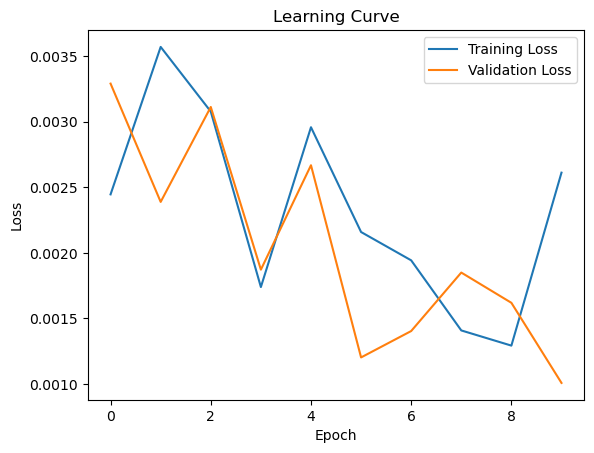

In [20]:
import matplotlib.pyplot as plt

# Split the data into train, validation and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create validation dataloader
val_dataset = LoLDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Modified training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.view(-1), labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.view(-1), labels)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    # Print losses for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# Plot learning curve
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import recall_score

def compute_recall(model, dataloader):
    model.eval()
    true_labels = []
    predictions = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            predicted = (outputs.view(-1) > 0.5).float()
            true_labels.extend(labels.tolist())
            predictions.extend(predicted.tolist())

    recall = recall_score(true_labels, predictions)
    return recall

val_recall = compute_recall(model, val_loader)
print(f"Recall on the validation set: {val_recall:.4f}")

Recall on the validation set: 1.0000
